## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier

**Ignoring Error Warnings**

In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('D:/Rick/Machine Learning/Datasets/automobile_loan_default/Train_Dataset.csv')

In [17]:
data.head(10)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
5,12191614,11250,0.0,1.0,1.0,1.0,1.0,13752,653.85,Alone,...,Yes,Yes,Other,NaN,0.697928,0.420611,0.0639,739.0,0.0,0
6,12128086,15750,1.0,1.0,0.0,1.0,0.0,128835,3779.55,Alone,...,Yes,Yes,XNA,0.729913,0.602545,0.511892,0.2041,0.0,3.0,0
7,12215264,13500,0.0,0.0,1.0,1.0,0.0,60415.2,3097.8,Alone,...,Yes,Yes,XNA,0.711468,0.657508,0.549597,NaN,1687.0,4.0,0
8,12159147,13500,1.0,1.0,0.0,1.0,1.0,45000,1200.15,Relative,...,Yes,Yes,Self-employed,0.475727,0.637594,0.553165,0.1670,1611.0,0.0,0
9,12130547,12150,0.0,0.0,0.0,1.0,0.0,16320.15,1294.65,Alone,...,Yes,Yes,XNA,0.682285,0.063343,0.08065,NaN,533.0,5.0,0


In [18]:
data.shape

(121856, 40)

The dataset contains 1,21,856 rows and 40 columns, including the target variable.

In [19]:
data.columns = data.columns.str.replace('_', ' ')

In [20]:
data.dtypes

ID                              int64
Client Income                  object
Car Owned                     float64
Bike Owned                    float64
Active Loan                   float64
House Own                     float64
Child Count                   float64
Credit Amount                  object
Loan Annuity                   object
Accompany Client               object
Client Income Type             object
Client Education               object
Client Marital Status          object
Client Gender                  object
Loan Contract Type             object
Client Housing Type            object
Population Region Relative     object
Age Days                       object
Employed Days                  object
Registration Days              object
ID Days                        object
Own House Age                 float64
Mobile Tag                      int64
Homephone Tag                   int64
Workphone Working               int64
Client Occupation              object
Client Famil

In [21]:
columns = ['Client Income', 'Credit Amount', 'Loan Annuity', 'Population Region Relative', 'Age Days', 
           'Employed Days', 'Registration Days', 'ID Days', 'Score Source 3']

data[columns] = data[columns].replace(['$', '@', '#VALUE!', '#', 'x', '&'], np.nan).astype(float)

In [22]:
data.dtypes

ID                              int64
Client Income                 float64
Car Owned                     float64
Bike Owned                    float64
Active Loan                   float64
House Own                     float64
Child Count                   float64
Credit Amount                 float64
Loan Annuity                  float64
Accompany Client               object
Client Income Type             object
Client Education               object
Client Marital Status          object
Client Gender                  object
Loan Contract Type             object
Client Housing Type            object
Population Region Relative    float64
Age Days                      float64
Employed Days                 float64
Registration Days             float64
ID Days                       float64
Own House Age                 float64
Mobile Tag                      int64
Homephone Tag                   int64
Workphone Working               int64
Client Occupation              object
Client Famil

The `ID` variable in the dataset won't do much help in the prediction of the response. So, we will drop the `ID` column from the dataset.

In [23]:
data.drop(['ID'], axis = 1, inplace = True)

## Handling the Missing Values

In [24]:
data.isnull().sum()

Client Income                  3622
Car Owned                      3581
Bike Owned                     3624
Active Loan                    3635
House Own                      3661
Child Count                    3638
Credit Amount                  3637
Loan Annuity                   4826
Accompany Client               1746
Client Income Type             3701
Client Education               3645
Client Marital Status          3473
Client Gender                  2413
Loan Contract Type             3651
Client Housing Type            3687
Population Region Relative     4868
Age Days                       3617
Employed Days                  3666
Registration Days              3631
ID Days                        5985
Own House Age                 80095
Mobile Tag                        0
Homephone Tag                     0
Workphone Working                 0
Client Occupation             41435
Client Family Members          2410
Cleint City Rating             2409
Application Process Day     

In [25]:
data.drop(['Own House Age', 'Client Occupation', 'Type Organization', 'Score Source 3'], axis = 1, inplace = True)

In [26]:
n_columns = data.select_dtypes(exclude = ['object']).columns

for col in n_columns:
    median = data[col].median()
    data[col].fillna(median, inplace = True)

We replaced the missing values with the median value of that column.

In [27]:
data.isnull().sum()

Client Income                    0
Car Owned                        0
Bike Owned                       0
Active Loan                      0
House Own                        0
Child Count                      0
Credit Amount                    0
Loan Annuity                     0
Accompany Client              1746
Client Income Type            3701
Client Education              3645
Client Marital Status         3473
Client Gender                 2413
Loan Contract Type            3651
Client Housing Type           3687
Population Region Relative       0
Age Days                         0
Employed Days                    0
Registration Days                0
ID Days                          0
Mobile Tag                       0
Homephone Tag                    0
Workphone Working                0
Client Family Members            0
Cleint City Rating               0
Application Process Day          0
Application Process Hour         0
Client Permanent Match Tag       0
Client Contact Work 

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Client Income,121856.0,16791.917344,11373.089724,2565.000000,11250.000000,14400.000000,20250.000000,1.800009e+06
Car Owned,121856.0,0.332778,0.471210,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Bike Owned,121856.0,0.322381,0.467390,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Active Loan,121856.0,0.484285,0.499755,0.000000,0.000000,0.000000,1.000000,1.000000e+00
House Own,121856.0,0.701311,0.457685,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Child Count,121856.0,0.405306,0.721353,0.000000,0.000000,0.000000,1.000000,1.900000e+01
Credit Amount,121856.0,59798.866099,39768.996022,4500.000000,27450.000000,51750.000000,80865.000000,4.050000e+05
Loan Annuity,121856.0,2712.482001,1432.884876,217.350000,1687.500000,2499.750000,3407.962500,2.250000e+04
Population Region Relative,121856.0,0.022453,0.405271,0.000533,0.010032,0.018850,0.026392,1.000000e+02
Age Days,121856.0,16018.713399,4301.353723,7676.000000,12512.000000,15734.000000,19544.000000,2.520100e+04


In [29]:
nn_columns = data.select_dtypes(include = ['object']).columns

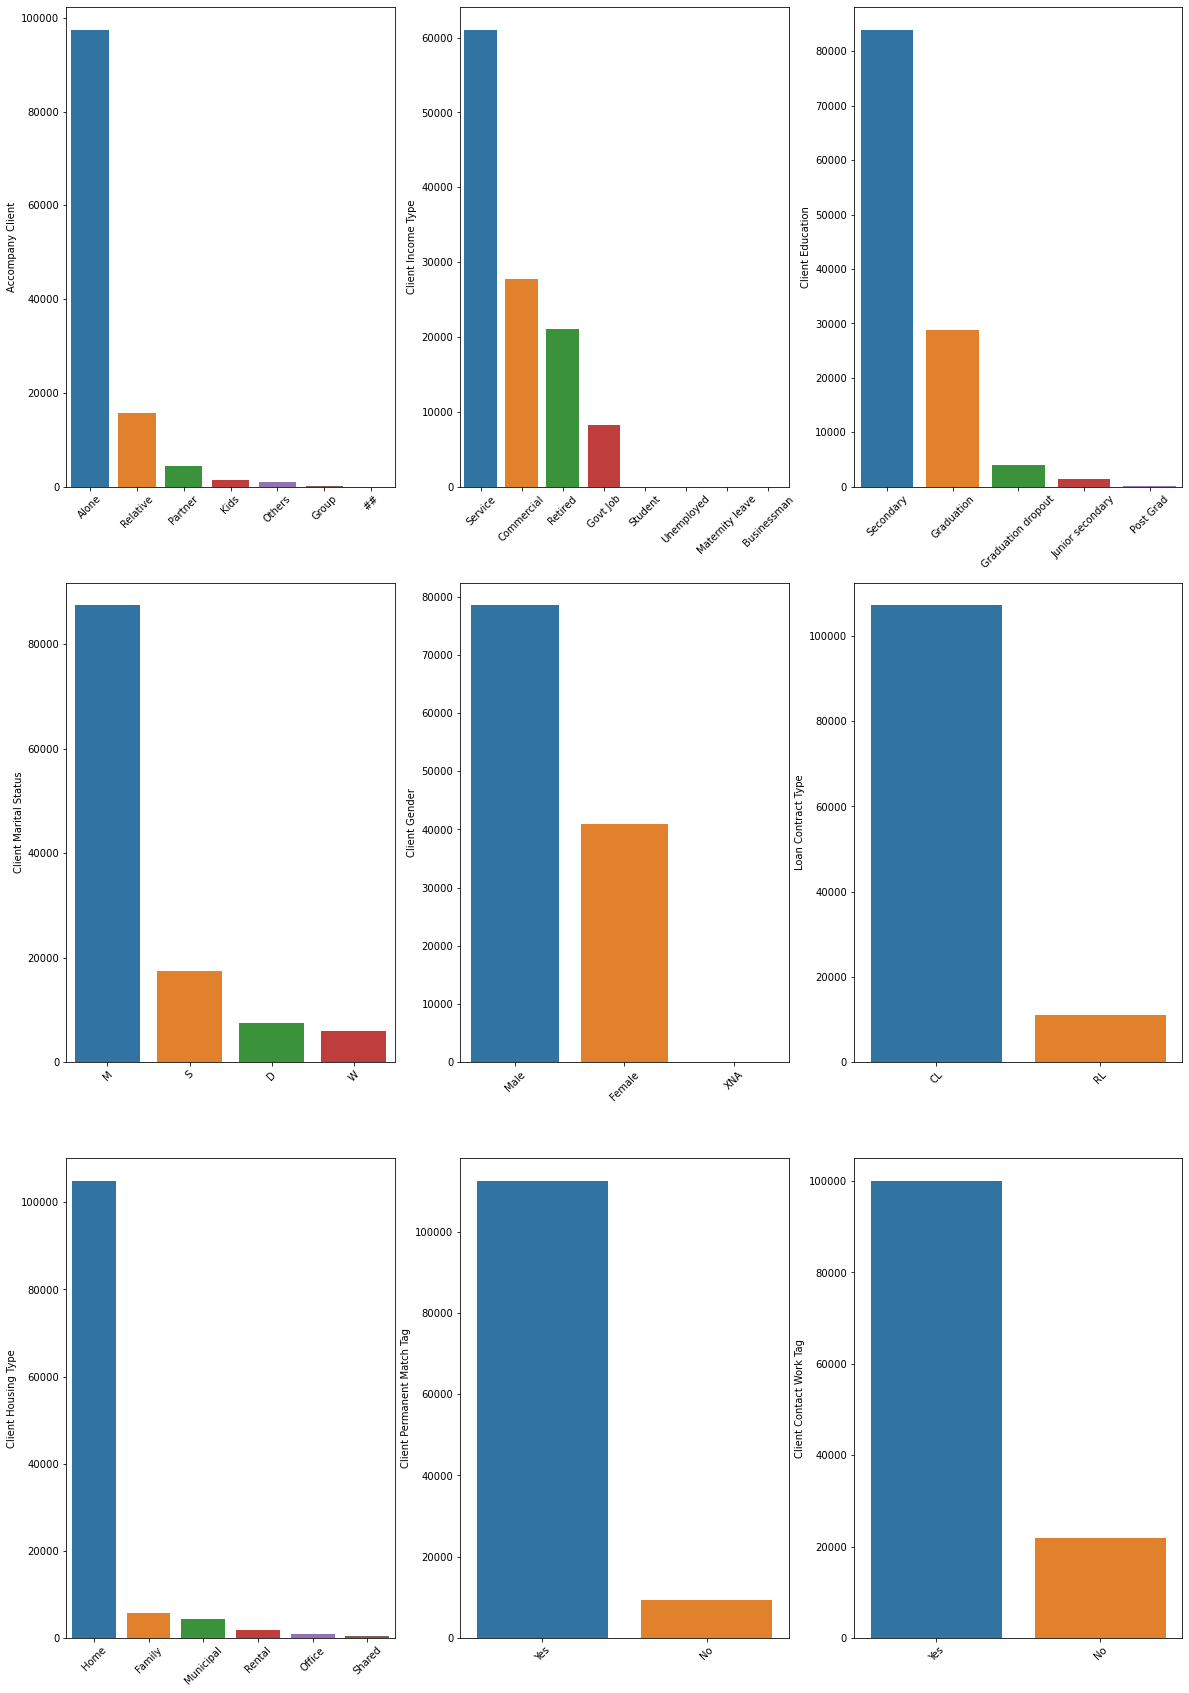

In [30]:
plt.figure(figsize = (20, 30))

for col, i in zip(nn_columns, range(len(nn_columns))):
    plt.subplot(3, 3, i+1)
    sns.barplot(x = data[col].value_counts().index, y = data[col].value_counts())
    plt.xticks(rotation = 45)

In [31]:
columns = ['Accompany Client', 'Client Gender']
data[columns] = data[columns].replace(['##', 'XNA'], np.nan)

In [32]:
columns = ['Accompany Client', 'Loan Contract Type', 'Client Housing Type']

imputer_mode = SimpleImputer(strategy = 'most_frequent')
data[columns] = imputer_mode.fit_transform(data[columns])

In [33]:
columns = ['Client Income Type', 'Client Education', 'Client Marital Status']

imputer_missing = SimpleImputer(strategy = 'constant', fill_value = 'missing')
data[columns] = imputer_missing.fit_transform(data[columns])

In [34]:
pd.Series({col: data[col].unique() for col in nn_columns})

Accompany Client                [Alone, Relative, Others, Kids, Partner, Group]
Client Income Type            [Commercial, Service, Retired, Govt Job, missi...
Client Education              [Secondary, Graduation, Graduation dropout, mi...
Client Marital Status                                     [M, W, S, missing, D]
Client Gender                                               [Male, Female, nan]
Loan Contract Type                                                     [CL, RL]
Client Housing Type           [Home, Family, Office, Municipal, Rental, Shared]
Client Permanent Match Tag                                            [Yes, No]
Client Contact Work Tag                                               [Yes, No]
dtype: object

**One Hot Encoding**

In [35]:
data = pd.get_dummies(data, columns = ['Accompany Client', 'Client Income Type', 'Client Education', 
                                       'Client Marital Status', 'Client Housing Type'])

**Label Encoding**

In [36]:
label_encode_cols = ['Loan Contract Type', 'Client Permanent Match Tag', 'Client Contact Work Tag']

le = LabelEncoder()

for col in label_encode_cols:
    data[col] = le.fit_transform(np.array(data[col]))

In [37]:
data.replace({'Female': 0, 'Male': 1}, inplace = True)

In [38]:
test = data[data['Client Gender'].isna()]
train = data.dropna()

X_train = train.drop(['Client Gender'], axis=1)
y_train = train['Client Gender']
X_test = test.drop(['Client Gender'], axis=1)

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

data.loc[data['Client Gender'].isnull(), 'Client Gender'] = y_pred

In [39]:
data.isnull().sum().sum()

0

In [40]:
data.shape

(121856, 62)

## Handling the Outliers

In [41]:
columns = ['Client Income', 'Credit Amount', 'Loan Annuity']

for col in columns:
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    
    data[col] = np.where(data[col] > upper_limit, 
                         upper_limit, 
                         np.where(data[col] < lower_limit, 
                                  lower_limit, 
                                  data[col]))

In [42]:
data["Default"].value_counts()

0    112011
1      9845
Name: Default, dtype: int64

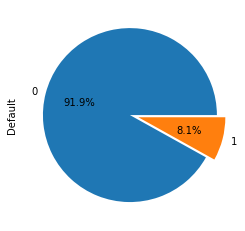

In [43]:
data["Default"].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%')
plt.show()

From the above pie chart, we can see that we have only about 8.1% loan defaulters in the dataset. So, this is an **imbalanced** dataset.

**Creating X and y**

In [44]:
X = data.drop(columns = 'Default')
y = data['Default']

## Train Test Split

We will use 30% of the data for testing and 70% for training.

In [45]:
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_idx, test_idx = next(strat_shuf_split.split(X, y))

In [46]:
X_train = X.iloc[train_idx]
y_train = y[train_idx]

X_test = X.iloc[test_idx]
y_test = y[test_idx]

Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models.

In [47]:
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of training samples: 85299
Number of test samples: 36557


In [48]:
y_train.value_counts(normalize = True)

0    0.919214
1    0.080786
Name: Default, dtype: float64

In [49]:
y_test.value_counts(normalize = True)

0    0.919195
1    0.080805
Name: Default, dtype: float64

## Feature Scaling

In [50]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We used the `MinMaxScaler` for scaling.

In [51]:
print(f"The range of feature inputs are within {X_train.min():0.2f} to {X_train.max():0.2f}")

The range of feature inputs are within 0.00 to 1.00


## Logistic Regression

In [52]:
model = LogisticRegression(random_state = 42, max_iter = 1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [53]:
def evaluate_metrics(yt, yp):
    precision, recall, fscore, _ = score(yt, yp, average = 'binary')
    print(classification_report(yt, yp))
    print('Accuracy:  ', round(accuracy_score(yt, yp), 2))
    print('Precision: ', round(precision, 2))
    print('Recall:    ', round(recall, 2))
    print('F1 Score:  ', round(fscore, 2))

In [54]:
evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33603
           1       0.00      0.00      0.00      2954

    accuracy                           0.92     36557
   macro avg       0.46      0.50      0.48     36557
weighted avg       0.84      0.92      0.88     36557

Accuracy:   0.92
Precision:  0.0
Recall:     0.0
F1 Score:   0.0


The function below will plot the confusion matrix for the models.

In [55]:
def error_matrix(yt, yp, mod_name):
    
    plt.figure(figsize = (8, 4))
    
    cm = confusion_matrix(yt, yp)
    ax = sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {"size": 30})

    ax.set_title(mod_name + '\n', fontsize = 20)

    ax.set_xlabel('Prediction', fontsize = 15)
    ax.set_ylabel('Actual', fontsize = 15)

    plt.show()

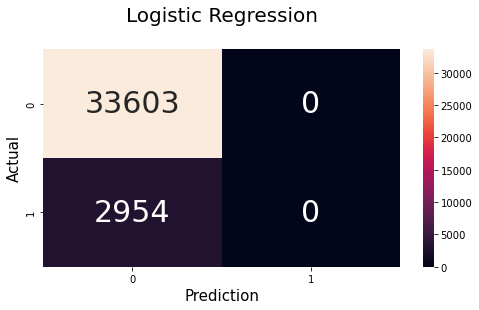

In [43]:
error_matrix(y_test, preds, 'Logistic Regression')

```
sns.set_context('talk')

fig, axList = plt.subplots(ncols = 2)
fig.set_size_inches(16, 8)

y_prob = lr_model.predict_proba(X_test)

ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth = 5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()
```

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     33603
           1       0.13      0.62      0.21      2954

    accuracy                           0.62     36557
   macro avg       0.54      0.62      0.48     36557
weighted avg       0.88      0.62      0.71     36557

Accuracy:   0.62
Precision:  0.13
Recall:     0.62
F1 Score:   0.21


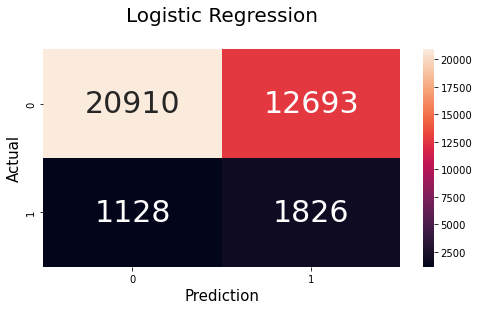

In [44]:
model = LogisticRegression(random_state = 42, class_weight = 'balanced')
model.fit(X_train, y_train)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

error_matrix(y_test, preds, 'Logistic Regression')

**SMOTE (Synthetic Minority Oversampling Technique)**

In [56]:
smote_sampler = SMOTE(random_state = 42)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

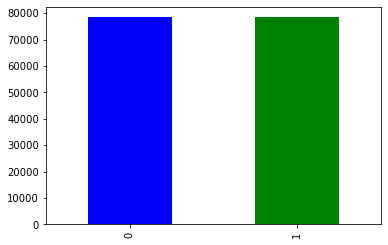

In [57]:
y_smo.value_counts().plot.bar(color = ['blue', 'green'])
plt.show()

In [58]:
over_sampler = RandomOverSampler(random_state = 42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)

In [48]:
under_sampler = RandomUnderSampler(random_state = 42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [49]:
model = LogisticRegression(random_state = 42)

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     33603
           1       0.12      0.61      0.21      2954

    accuracy                           0.62     36557
   macro avg       0.54      0.62      0.48     36557
weighted avg       0.88      0.62      0.71     36557

Accuracy:   0.62
Precision:  0.12
Recall:     0.61
F1 Score:   0.21


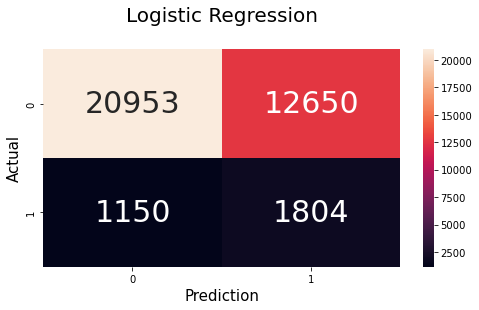

In [50]:
model.fit(X_smo, y_smo)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

error_matrix(y_test, preds, 'Logistic Regression')

              precision    recall  f1-score   support

           0       0.95      0.51      0.66     33603
           1       0.11      0.72      0.20      2954

    accuracy                           0.53     36557
   macro avg       0.53      0.61      0.43     36557
weighted avg       0.89      0.53      0.63     36557

Accuracy:   0.53
Precision:  0.11
Recall:     0.72
F1 Score:   0.2


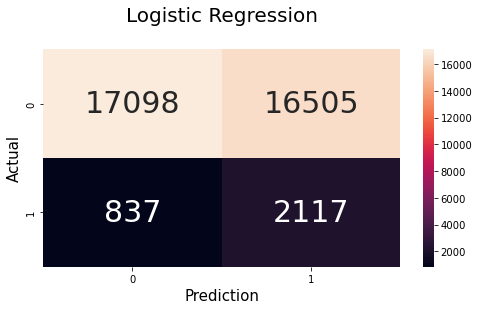

In [51]:
THRESHOLD = 0.45
preds = np.where(model.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)

evaluate_metrics(y_test, preds)

error_matrix(y_test, preds, 'Logistic Regression')

In [52]:
model.fit(X_under, y_under)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     33603
           1       0.13      0.62      0.21      2954

    accuracy                           0.62     36557
   macro avg       0.54      0.62      0.48     36557
weighted avg       0.88      0.62      0.70     36557

Accuracy:   0.62
Precision:  0.13
Recall:     0.62
F1 Score:   0.21


In [53]:
model.fit(X_over, y_over)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     33603
           1       0.13      0.63      0.21      2954

    accuracy                           0.62     36557
   macro avg       0.54      0.62      0.48     36557
weighted avg       0.88      0.62      0.71     36557

Accuracy:   0.62
Precision:  0.13
Recall:     0.63
F1 Score:   0.21


In [54]:
model = LogisticRegression(random_state = 42, class_weight = {0: 0.08, 1: 0.92})
model.fit(X_train, y_train)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.95      0.61      0.74     33603
           1       0.12      0.62      0.21      2954

    accuracy                           0.61     36557
   macro avg       0.54      0.62      0.47     36557
weighted avg       0.88      0.61      0.70     36557

Accuracy:   0.61
Precision:  0.12
Recall:     0.62
F1 Score:   0.21


## Random Forest

```
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split' : [10, 11, 12, 13, 14, 15]}

grid = GridSearchCV(RandomForestClassifier(random_state = 42), 
                    param_grid = param_grid, 
                    scoring = 'f1',
                    n_jobs = -1)

grid.fit(X_smo, y_smo)

grid.best_params_
```

In [66]:
def RFC(n_estimators_list, threshold):
    f1_list = list()

    for n_estimators in n_estimators_list:
    
        model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42, n_jobs = -1)
    
        print(f'Fitting model with {n_estimators} trees')
        model.fit(X_smo, y_smo)
    
        preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
        f1 = f1_score(y_test, preds)
        f1_list.append(pd.Series({'Number of Trees': n_estimators, 'F1 Score': f1}))

    f1_df = pd.concat(f1_list, axis = 1).T.set_index('Number of Trees')
    
    ax = f1_df.plot(marker = 'o', figsize = (10, 5))
    ax.set(ylabel = 'F1 Score')
    plt.show()
    
    return f1_df

In [64]:
n_estimators_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


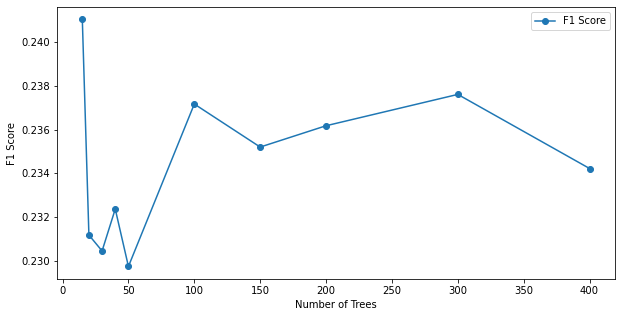

,F1 Score
Number of Trees,
15.0,0.241044
20.0,0.231169
30.0,0.230439
40.0,0.232358
50.0,0.229730
100.0,0.237167
150.0,0.235196
200.0,0.236173
300.0,0.237607


In [65]:
RFC(n_estimators_list, 0.5)

In [68]:
def RFC_model(n_estimators, threshold):
    model = RandomForestClassifier(n_estimators  = n_estimators, random_state  = 42, n_jobs = -1)
    model.fit(X_smo, y_smo)

    preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
    evaluate_metrics(y_test, preds)
    
    error_matrix(y_test, preds, 'Random Forest Classifier')

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     33603
           1       0.40      0.17      0.24      2954

    accuracy                           0.91     36557
   macro avg       0.67      0.57      0.60     36557
weighted avg       0.89      0.91      0.90     36557

Accuracy:   0.91
Precision:  0.4
Recall:     0.17
F1 Score:   0.24


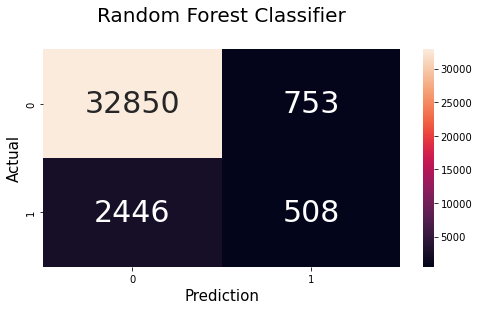

In [69]:
RFC_model(15, 0.5)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


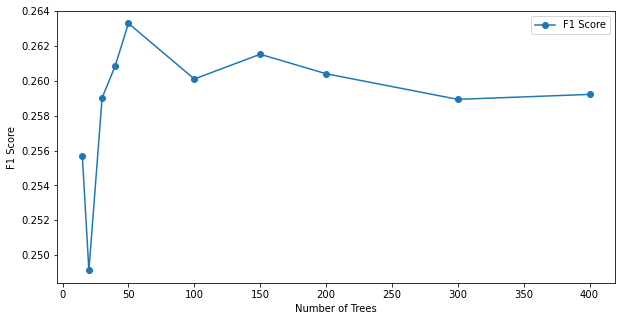

,F1 Score
Number of Trees,
15.0,0.255692
20.0,0.249127
30.0,0.259013
40.0,0.260870
50.0,0.263296
100.0,0.260105
150.0,0.261523
200.0,0.260406
300.0,0.258938


In [70]:
RFC(n_estimators_list, 0.45)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     33603
           1       0.45      0.19      0.26      2954

    accuracy                           0.92     36557
   macro avg       0.69      0.58      0.61     36557
weighted avg       0.89      0.92      0.90     36557

Accuracy:   0.92
Precision:  0.45
Recall:     0.19
F1 Score:   0.26


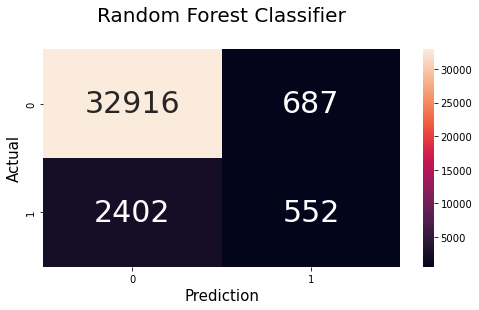

In [71]:
RFC_model(50, 0.45)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


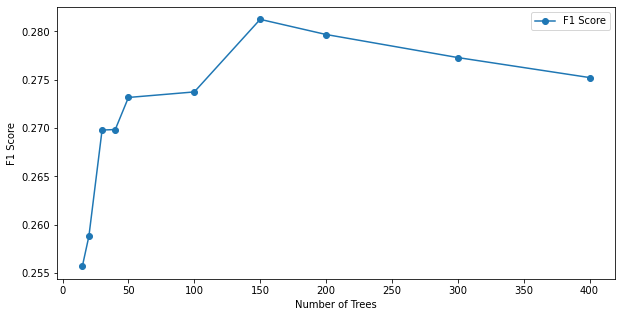

,F1 Score
Number of Trees,
15.0,0.255692
20.0,0.258819
30.0,0.269802
40.0,0.269851
50.0,0.273171
100.0,0.273744
150.0,0.281250
200.0,0.279683
300.0,0.277298


In [72]:
RFC(n_estimators_list, 0.4)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     33603
           1       0.40      0.22      0.28      2954

    accuracy                           0.91     36557
   macro avg       0.67      0.59      0.62     36557
weighted avg       0.89      0.91      0.90     36557

Accuracy:   0.91
Precision:  0.4
Recall:     0.22
F1 Score:   0.28


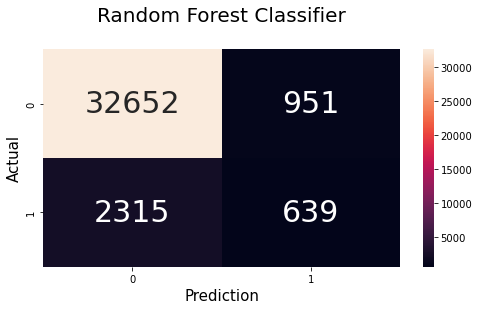

In [73]:
RFC_model(150, 0.4)

In [62]:
threshold_list = [0.5, 0.45, 0.4, 0.35, 0.33, 0.3]
n_estimators_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

In [61]:
max_f1_list = list()
n_trees_list = list()

for threshold in threshold_list:
    
    f1_list = list()

    for n_estimators in n_estimators_list:
    
        model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42, n_jobs = -1)
    
        model.fit(X_smo, y_smo)
    
        preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
        f1 = f1_score(y_test, preds)
        f1_list.append(f1)

    max_f1 = max(f1_list)
    ind = np.argmax(f1_list)
    
    max_f1_list.append(max_f1)
    n_trees_list.append(n_estimators_list[ind])

threshold_df = pd.DataFrame({'Threshold': threshold_list, 
                             'Number of Trees': n_trees_list, 
                             'F1 Score': max_f1_list}).set_index('Threshold')
threshold_df

,Threshold,Number of Trees,F1 Score
0,0.50,15,0.241044
1,0.45,50,0.263296
2,0.40,150,0.281250
3,0.35,150,0.289845
4,0.33,400,0.293863


## Extra Trees Classifier

In [76]:
def ETC(n_estimators_list, threshold):
    f1_list = list()

    for n_estimators in n_estimators_list:
    
        model = ExtraTreesClassifier(n_estimators = n_estimators, random_state = 42, n_jobs = -1)
    
        print(f'Fitting model with {n_estimators} trees')
        model.fit(X_smo, y_smo)
    
        preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
        f1 = f1_score(y_test, preds)
        f1_list.append(pd.Series({'Number of Trees': n_estimators, 'F1 Score': f1}))

    f1_df = pd.concat(f1_list, axis = 1).T.set_index('Number of Trees')
    
    ax = f1_df.plot(marker = 'o', figsize = (10, 5))
    ax.set(ylabel = 'F1 Score')
    plt.show()
    
    return f1_df

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


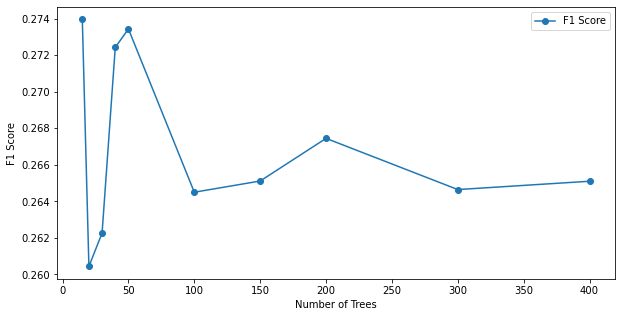

,F1 Score
Number of Trees,
15.0,0.273960
20.0,0.260435
30.0,0.262262
40.0,0.272424
50.0,0.273433
100.0,0.264498
150.0,0.265111
200.0,0.267445
300.0,0.264643


In [77]:
ETC(n_estimators_list, 0.5)

In [78]:
def ETC_model(n_estimators, threshold):
    model = ExtraTreesClassifier(n_estimators  = n_estimators, random_state  = 42, n_jobs = -1)
    model.fit(X_smo, y_smo)

    preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
    evaluate_metrics(y_test, preds)
    
    error_matrix(y_test, preds, 'Extra Trees Classifier')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     33603
           1       0.41      0.21      0.27      2954

    accuracy                           0.91     36557
   macro avg       0.67      0.59      0.61     36557
weighted avg       0.89      0.91      0.90     36557

Accuracy:   0.91
Precision:  0.41
Recall:     0.21
F1 Score:   0.27


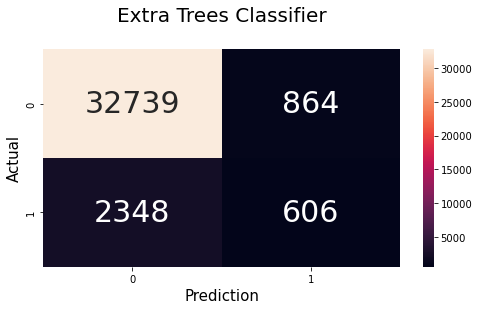

In [83]:
ETC_model(15, 0.5)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


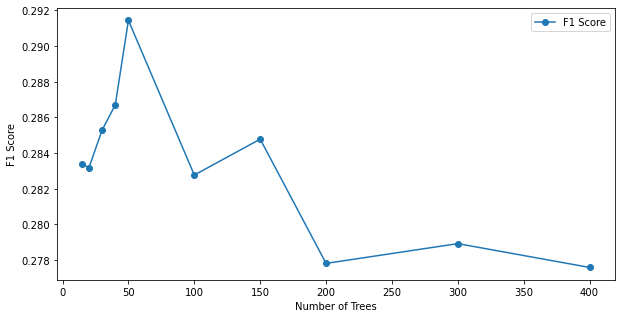

,F1 Score
Number of Trees,
15.0,0.283407
20.0,0.283166
30.0,0.285283
40.0,0.286693
50.0,0.291432
100.0,0.282767
150.0,0.284778
200.0,0.277817
300.0,0.278925


In [80]:
ETC(n_estimators_list, 0.45)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     33603
           1       0.43      0.22      0.29      2954

    accuracy                           0.91     36557
   macro avg       0.68      0.60      0.62     36557
weighted avg       0.89      0.91      0.90     36557

Accuracy:   0.91
Precision:  0.43
Recall:     0.22
F1 Score:   0.29


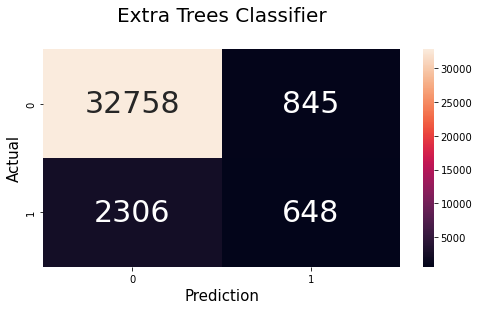

In [84]:
ETC_model(50, 0.45)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


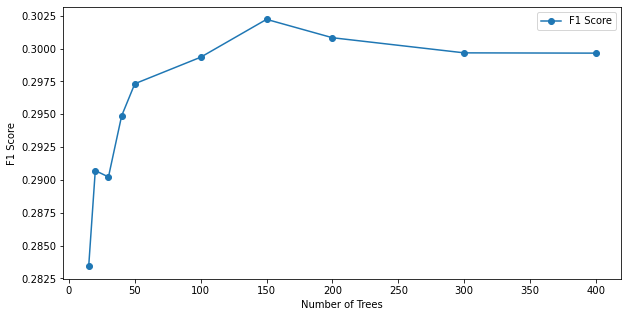

,F1 Score
Number of Trees,
15.0,0.283407
20.0,0.290711
30.0,0.290223
40.0,0.294874
50.0,0.297324
100.0,0.299344
150.0,0.302228
200.0,0.300828
300.0,0.299676


In [85]:
ETC(n_estimators_list, 0.4)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     33603
           1       0.37      0.25      0.30      2954

    accuracy                           0.90     36557
   macro avg       0.65      0.61      0.63     36557
weighted avg       0.89      0.90      0.90     36557

Accuracy:   0.9
Precision:  0.37
Recall:     0.25
F1 Score:   0.3


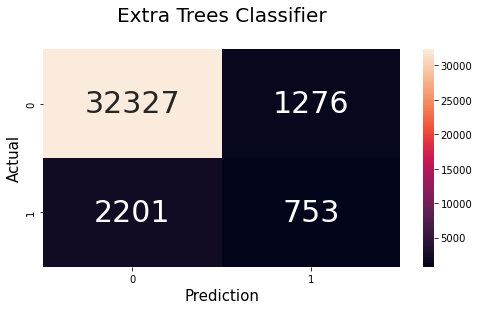

In [86]:
ETC_model(150, 0.4)

Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees
Fitting model with 450 trees
Fitting model with 500 trees


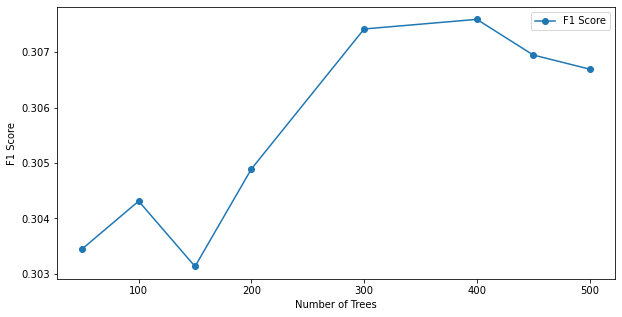

,F1 Score
Number of Trees,
50.0,0.303452
100.0,0.304313
150.0,0.303135
200.0,0.304894
300.0,0.307419
400.0,0.307593
450.0,0.306950
500.0,0.306695


In [88]:
ETC([50, 100, 150, 200, 300, 400, 450, 500], 0.35)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     33603
           1       0.29      0.32      0.31      2954

    accuracy                           0.88     36557
   macro avg       0.62      0.63      0.62     36557
weighted avg       0.89      0.88      0.89     36557

Accuracy:   0.88
Precision:  0.29
Recall:     0.32
F1 Score:   0.31


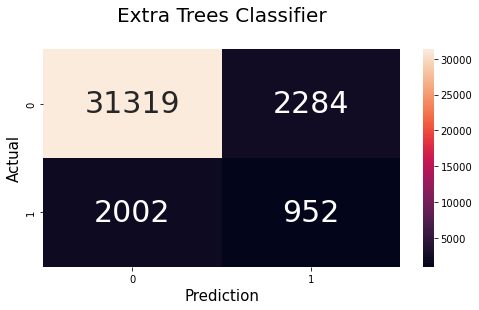

In [89]:
ETC_model(400, 0.35)

Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees
Fitting model with 450 trees
Fitting model with 500 trees


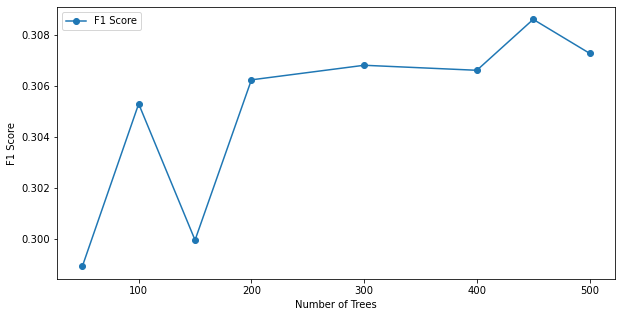

,F1 Score
Number of Trees,
50.0,0.298906
100.0,0.305302
150.0,0.299943
200.0,0.306246
300.0,0.306820
400.0,0.306622
450.0,0.308626
500.0,0.307290


In [91]:
ETC([50, 100, 150, 200, 300, 400, 450, 500], 0.33)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     33603
           1       0.27      0.36      0.31      2954

    accuracy                           0.87     36557
   macro avg       0.61      0.64      0.62     36557
weighted avg       0.89      0.87      0.88     36557

Accuracy:   0.87
Precision:  0.27
Recall:     0.36
F1 Score:   0.31


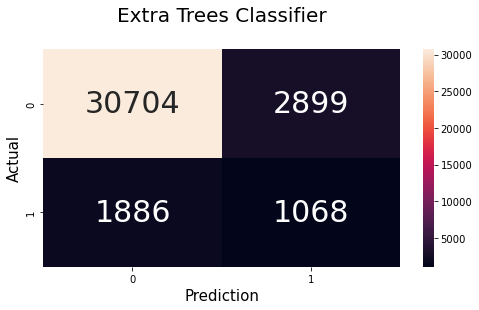

In [92]:
ETC_model(450, 0.33)

In [63]:
max_f1_list = list()
n_trees_list = list()

for threshold in threshold_list:
    
    f1_list = list()

    for n_estimators in n_estimators_list:
    
        model = ExtraTreesClassifier(n_estimators = n_estimators, random_state = 42, n_jobs = -1)
        model.fit(X_smo, y_smo)
    
        preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
        f1 = f1_score(y_test, preds)
        f1_list.append(f1)

    max_f1 = max(f1_list)
    ind = np.argmax(f1_list)
    
    max_f1_list.append(max_f1)
    n_trees_list.append(n_estimators_list[ind])

threshold_df = pd.DataFrame({'Threshold': threshold_list, 
                             'Number of Trees': n_trees_list, 
                             'F1 Score': max_f1_list}).set_index('Threshold')
threshold_df

,Number of Trees,F1 Score
Threshold,,
0.50,15,0.273960
0.45,50,0.291432
0.40,150,0.302228
0.35,400,0.307593
0.33,300,0.306820
0.30,300,0.306404


## Gradient Boosting Classifier

In [93]:
def GBC(n_estimators_list, threshold):
    f1_list = list()

    for n_estimators in n_estimators_list:
    
        model = GradientBoostingClassifier(n_estimators = n_estimators, random_state = 42)
    
        print(f'Fitting model with {n_estimators} trees')
        model.fit(X_smo, y_smo)
    
        preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
        f1 = f1_score(y_test, preds)
        f1_list.append(pd.Series({'Number of Trees': n_estimators, 'F1 Score': f1}))

    f1_df = pd.concat(f1_list, axis = 1).T.set_index('Number of Trees')
    
    ax = f1_df.plot(marker = 'o', figsize = (10, 5))
    ax.set(ylabel = 'F1 Score')
    plt.show()
    
    return f1_df

In [ ]:
n_estimators_list = [15, 20, 30, 40, 50, 100, 150, 200]

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


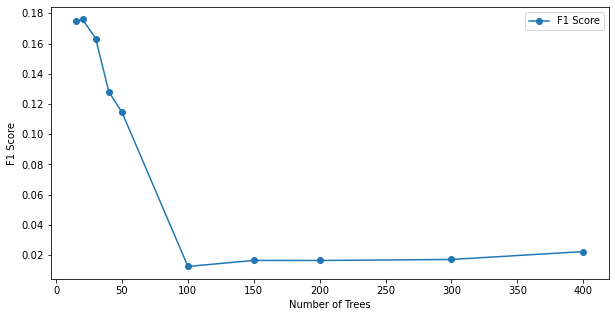

,F1 Score
Number of Trees,
15.0,0.174848
20.0,0.175972
30.0,0.163278
40.0,0.128044
50.0,0.114420
100.0,0.012579
150.0,0.016562
200.0,0.016518
300.0,0.017196


In [94]:
GBC(n_estimators_list, 0.5)

In [95]:
def GBC_model(n_estimators, threshold):
    model = GradientBoostingClassifier(n_estimators  = n_estimators, random_state  = 42)
    model.fit(X_smo, y_smo)

    preds = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    
    evaluate_metrics(y_test, preds)
    
    error_matrix(y_test, preds, 'Gradient Boosting Classifier')

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     33603
           1       0.13      0.25      0.18      2954

    accuracy                           0.81     36557
   macro avg       0.53      0.56      0.53     36557
weighted avg       0.86      0.81      0.83     36557

Accuracy:   0.81
Precision:  0.13
Recall:     0.25
F1 Score:   0.18


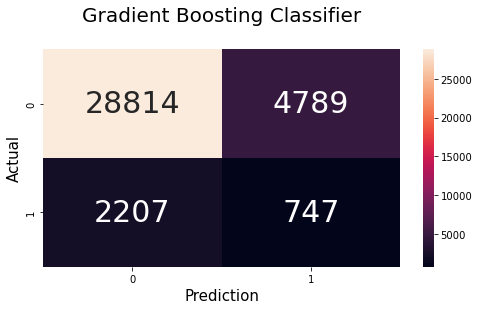

In [96]:
GBC_model(20, 0.5)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


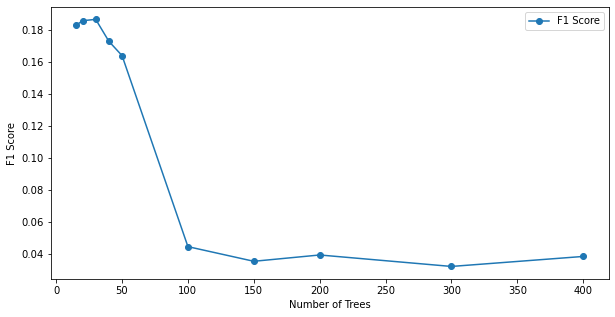

,F1 Score
Number of Trees,
15.0,0.183030
20.0,0.185938
30.0,0.186797
40.0,0.173059
50.0,0.164099
100.0,0.044594
150.0,0.035432
200.0,0.039378
300.0,0.032206


In [97]:
GBC(n_estimators_list, 0.45)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     33603
           1       0.13      0.30      0.19      2954

    accuracy                           0.79     36557
   macro avg       0.53      0.57      0.53     36557
weighted avg       0.87      0.79      0.82     36557

Accuracy:   0.79
Precision:  0.13
Recall:     0.3
F1 Score:   0.19


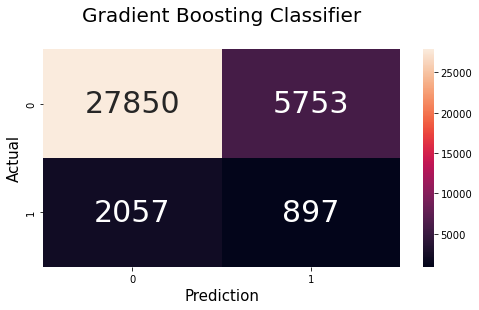

In [98]:
GBC_model(30, 0.45)

Fitting model with 15 trees
Fitting model with 20 trees
Fitting model with 30 trees
Fitting model with 40 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 150 trees
Fitting model with 200 trees
Fitting model with 300 trees
Fitting model with 400 trees


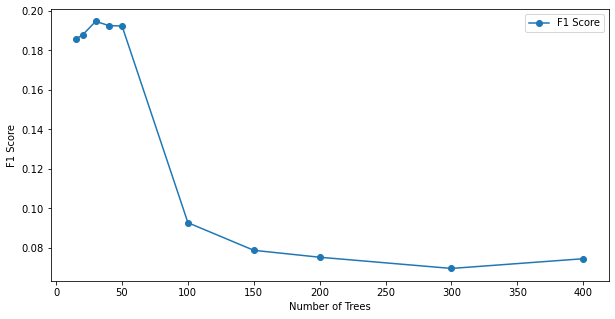

,F1 Score
Number of Trees,
15.0,0.185835
20.0,0.187813
30.0,0.194728
40.0,0.192584
50.0,0.192356
100.0,0.092682
150.0,0.078696
200.0,0.075188
300.0,0.069507


In [99]:
GBC(n_estimators_list, 0.4)

## Ada Boost Classifier

In [44]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1))

param_grid = {'n_estimators': [200, 300, 400, 500, 600],
              'learning_rate': [0.1, 0.2, 0.3, 0.4]}

grid = GridSearchCV(model,
                    param_grid = param_grid, 
                    scoring = 'f1',
                    n_jobs = -1)

grid.fit(X_smo, y_smo)

grid.best_params_

{'learning_rate': 0.4, 'n_estimators': 600}

In [46]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), 
                           n_estimators  = 400, 
                           learning_rate = 0.2,
                           random_state  = 42)
model.fit(X_smo, y_smo)

preds = model.predict(X_test)

evaluate_metrics(y_test, preds)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     33603
           1       0.17      0.12      0.14      2954

    accuracy                           0.88     36557
   macro avg       0.55      0.53      0.54     36557
weighted avg       0.86      0.88      0.87     36557

Accuracy:   0.88
Precision:  0.17
Recall:     0.12
F1 Score:   0.14


In [9]:
l = [12, 5, 18, 6, 9, 0, 5]
y = np.argmax(l)

In [10]:
l.append(3)

In [11]:
l

[12, 5, 18, 6, 9, 0, 5, 3]

In [13]:
df = pd.DataFrame({'l': l})

In [14]:
df

,l
0,12
1,5
2,18
3,6
4,9
5,0
6,5
7,3
